# Import libraries

In [22]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve, roc_auc_score
import pickle

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Reading data & preliminary statistics

In [2]:
data_raw = pd.read_csv("data-problem-statement-1-heart-disease.csv")
data_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## No. of rows and columns

In [3]:
print("No of Rows: {0}".format(data_raw.shape[0]))
print("No of Columns: {0}".format(data_raw.shape[1]))


No of Rows: 297
No of Columns: 14


## Data description

In [4]:
data_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## Preprocessing

In [6]:
data_raw.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

## Value counts

In [7]:
for col in data_raw.columns.to_list():
    print("\n------- {0} -------\n".format(col))
    print(data_raw[col].value_counts())


------- age -------

58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: age, dtype: int64

------- sex -------

1    201
0     96
Name: sex, dtype: int64

------- cp -------

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

------- trestbps -------

120    37
130    36
140    32
110    19
150    17
160    11
128    10
125    10
138    10
112     9
118     7
132     7
108     6
124     6
135     6
152     5
145     5
134     5
100     4
170     4
122     4
126     3
142     3
115     3
180     3
105     3
136     3
178     2
146     2
102     2
148     2
94      2
144     2
117     1
123     1
200     1
165     1
114     1
164     1
174     1
158     1
101 

## Null Records %

In [8]:
for col in data_raw.columns.to_list():
    print("\n{0} -------> {1}".format(col, round(data_raw[col].isna().sum()/data_raw.shape[0],2)))



age -------> 0.0

sex -------> 0.0

cp -------> 0.0

trestbps -------> 0.0

chol -------> 0.0

fbs -------> 0.0

restecg -------> 0.0

thalach -------> 0.0

exang -------> 0.0

oldpeak -------> 0.0

slope -------> 0.0

ca -------> 0.0

thal -------> 0.0

condition -------> 0.0


# EDA & Visualization

## Processing

In [9]:
data_processed = data_raw.copy()
# data_processed.drop("customerID", axis=1, inplace=True)
# data_processed["SeniorCitizen"].replace({0:"No",1: "Yes"}, inplace=True)


## Visualization

In [10]:
def histogram_visualization(col):
    fig = px.histogram(data_processed, x=col,color="condition",
                   template="plotly_dark",
                   title="{0} vs Condition".format(col))
    fig.update_layout(title_x = 0.5,)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [11]:
def scatter_visualization(x_par,y_par):
    fig = px.scatter(data_processed, x=x_par,y=y_par,color="condition",
                   template="plotly_dark",
                   title="{} vs {}".format(x_par,y_par))
    fig.update_layout(title_x = 0.5,)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

## Outliers

In [12]:
fig = px.box(data_processed, y=["age","trestbps","chol","thalach","oldpeak"],
             labels={
                     "variable": "Columns with numerical values",
                     "value": "Values",
                 },
             template="plotly_dark",
             title="Outliers Visulaization")
fig.update_layout(title_x = 0.5,)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [13]:
col_list = ["age","trestbps","chol","thalach","oldpeak"]
for col in col_list:
    histogram_visualization(col)

### Insight 
The customer is more likley to churn if he/she is not a senior citizen, has no partner, uses a phone service and fiber, but not uses Online Security and backup

In [14]:
x_col_list = ["age","trestbps","chol","thalach","oldpeak"]
y_col_list = x_col_list
for x in x_col_list:
    for y in y_col_list:
        if x==y:
            continue
        else:
            scatter_visualization(x,y)


In [15]:
fig = px.scatter(data_processed, x="trestbps",y="chol",size="cp",color="condition",
                   template="plotly_dark",
                   title="Chol vs trestbps, bubble size denotes chest pain")
fig.update_layout(title_x = 0.5,)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Model Building

## Preprocessing

In [16]:
cat_columns =["sex","cp","fbs","restecg","exang","slope","ca","thal"]
for col_name in cat_columns:
    data_processed[col_name]= data_processed[col_name].astype('category')


## Train-Test Split

In [25]:
X = data_processed.drop("condition",axis=1)
y = data_processed["condition"]

# y.replace({"Yes":1,"No":0},inplace=True)

# X_enc = pd.get_dummies(X, drop_first=True)

# fit scaler on training data
scaler = MinMaxScaler()

# transform training data
col_list = ["trestbps","chol","thalach","oldpeak"]
for col in col_list:
    X[col] = scaler.fit_transform(X[col].to_numpy().reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=111,stratify=y)

## Applying Models

In [27]:
def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))
    
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+''')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print("F1 Score: ",f1_score(y_train, pred_train,average="macro"))
    
    print('''
            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+''')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))
    print("F1 Score: ",f1_score(y_test, pred_test,average="macro"))


In [28]:
def plot_roc_curve(model,X_test,y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


***** Performing for GaussianNB() *****


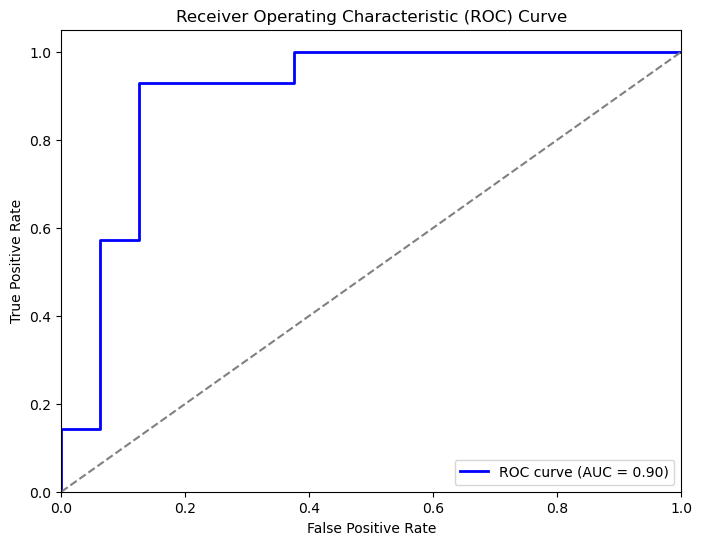


            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.87      0.80      0.84       123

    accuracy                           0.85       267
   macro avg       0.86      0.85      0.85       267
weighted avg       0.85      0.85      0.85       267

[[129  15]
 [ 24  99]]
F1 Score:  0.852064953330776

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



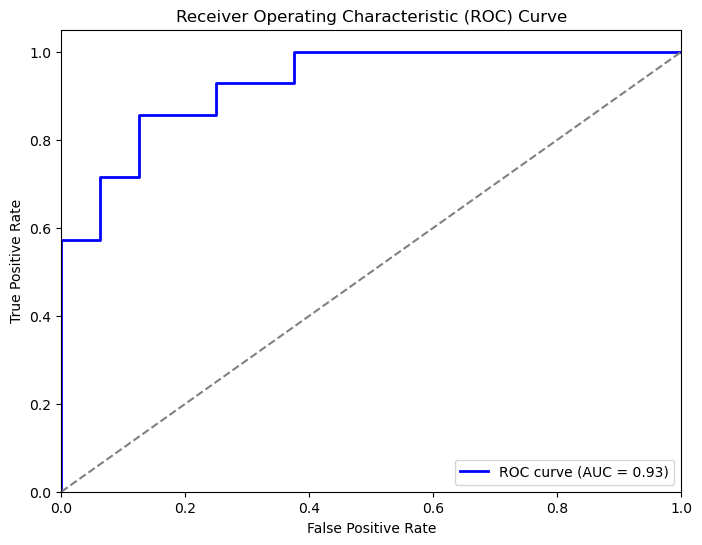


            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.85      0.81      0.83       123

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[126  18]
 [ 23 100]]
F1 Score:  0.8449718890289324

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84     

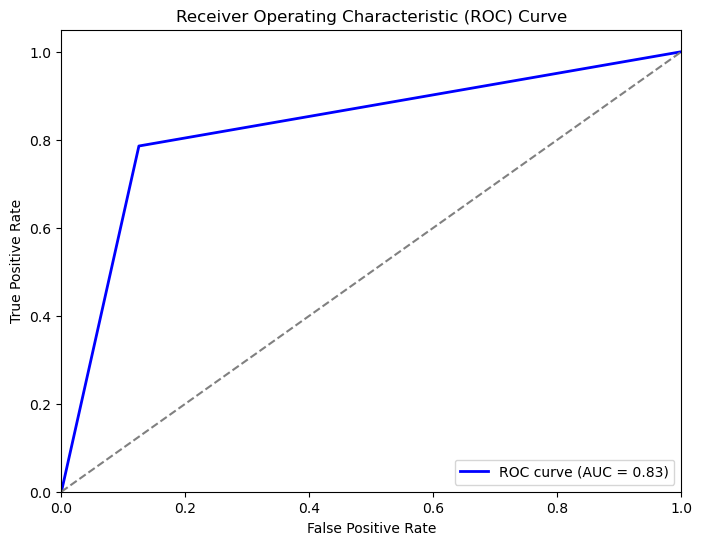


            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       123

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267

[[144   0]
 [  0 123]]
F1 Score:  1.0

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.85      0.79      0.81        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83

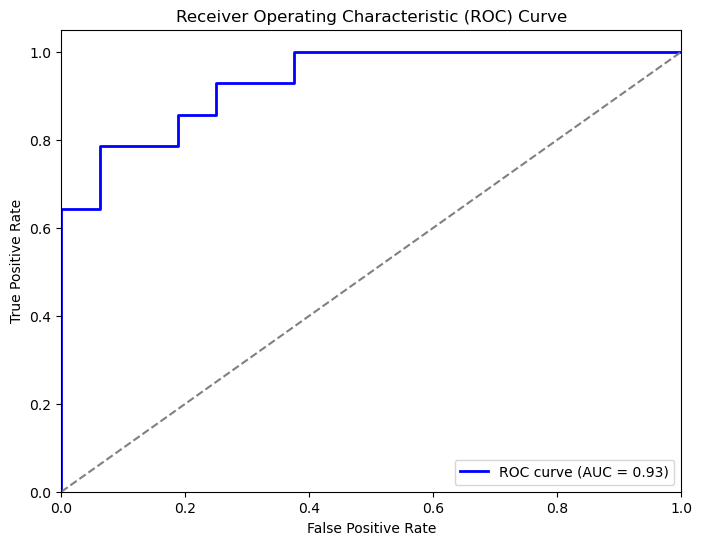


            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       123

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267

[[144   0]
 [  0 123]]
F1 Score:  1.0

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.85      0.79      0.81        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83

In [29]:
model_list = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
for model in model_list:
    print("\n***** Performing for {0} *****".format(model))
    model, pred_train, pred_test = model_building(X_train, y_train,X_test,model,params = None)
    try:
        plot_roc_curve(model,X_test,y_test)
    except:
        print("Unable to create a model for {0}".format(model))
    model_evaluation(y_train, pred_train, y_test, pred_test)

In [30]:
model, pred_train, pred_test = model_building(X_train, y_train,X_test,GaussianNB(),params = None)
pickle.dump(model, open('model.pkl','wb'))

## Hyper Parameter Tuning

In [47]:
estimators = [
    (LogisticRegression(), {"penalty": ["l1","l2","elasticnet"],
                           "solver":["liblinear","saga"]}),
                                                      
    
    (DecisionTreeClassifier(), {'criterion' : ["entropy","gini"],
                                          "splitter": ["best","random"],
                                          "min_samples_split" : [2,4,6,10], 
                                          "max_depth" : [5, 10], 'class_weight' : ['balanced',None]}),
    
    (RandomForestClassifier(), {'criterion' : ["entropy","gini"],
                                          "min_samples_split" : [2,4,6,10], 
                                          "max_depth" : [5, 10], 'class_weight' : ['balanced',None]}),

    # (SVC(), {"kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"]}),

    (SVC(), {"kernel": ["linear"]})
                
                                          ]

for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train, y_train, X_test, 
                                                            estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

d:\Softwares\anaconda3\lib\site-pa

			 LogisticRegression 

{'penalty': 'l1', 'solver': 'liblinear'} 



            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.87      0.80      0.83       123

    accuracy                           0.85       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.85      0.85      0.85       267

[[129  15]
 [ 25  98]]
F1 Score:  0.8481401433284042

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg 

# Miscellaneous

## ROC Curve

## Vizualization code

## Label Encoding